## Project 8 - Adult

This dataset is related to the income range of the people in various categories. The total dataset is divided in various categories of the people which shows their income range. Hence this project is made to classify all the people depending upon their income range and all their attributes which are related to their income. 

### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Making a Prediction
* Predicting the Error
* Comparison of the results of the models

#### Regular EDS and plotting Libraries

In [84]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing the dataset

In [85]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 8 - Adult'

#### Loading the dataset

In [86]:
df1 = pd.read_csv('adult_data.csv', header = None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [87]:
df2 = pd.read_csv('adult_names.csv',header = None)

temp = ["age"]
for i in range(1,len(df2[0])):
    temp.append(df2[0][i])
print (temp)

df1.columns = temp
print(df1.head)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary range']
<bound method NDFrame.head of        age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
325

#### Converting the Data into a DataFrame

In [88]:
df = pd.DataFrame(df1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary range
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Detail and description of the DataFrame

In [89]:
df.shape

(32561, 15)

In [90]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Data Cleaning

In [91]:
df.isnull().sum()/df.shape[0] *100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary range      0.0
dtype: float64

In [92]:
#### To show a quick insight to the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary range    32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Counting the details of the last column in our DataFrame

In [93]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary range'],
      dtype='object')

In [94]:
df.replace('?', np.nan, inplace= True)

In [95]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary range      0
dtype: int64

#### Counting the details of the last in our DataFrame

In [96]:
# Counting the values
df['salary range'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary range, dtype: int64

In [97]:
# Normalized value counts
df['salary range'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: salary range, dtype: float64

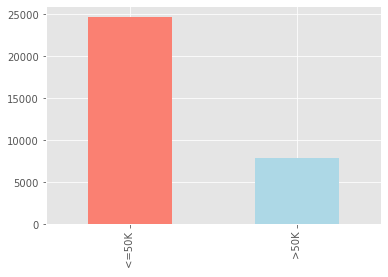

In [98]:
# Plot the value counts with a bar graph
df['salary range'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [99]:
df.rename(columns = {'salary range':'SalaryRange'}, inplace = True)

In [100]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,SalaryRange
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [101]:
# Compare target column with sex column
pd.crosstab(df.occupation, df.SalaryRange)

SalaryRange,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
Farming-fishing,879,115
Handlers-cleaners,1284,86
Machine-op-inspct,1752,250
Other-service,3158,137


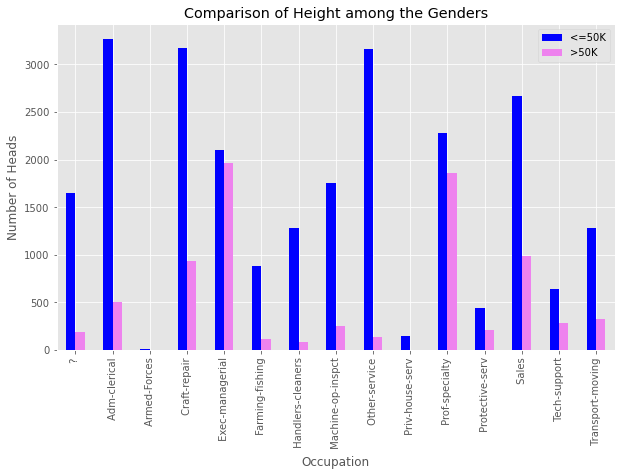

In [104]:
# Create a plot
pd.crosstab(df.occupation, df.SalaryRange).plot(kind="bar", figsize=(10,6), color=["blue", "violet"])

plt.title("Comparison of Height among the Genders")
plt.xlabel("Occupation")
plt.ylabel("Number of Heads")
plt.legend(["<=50K", ">50K"])
plt.xticks(rotation=90); 

#### Correlation between independent variables

In [105]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


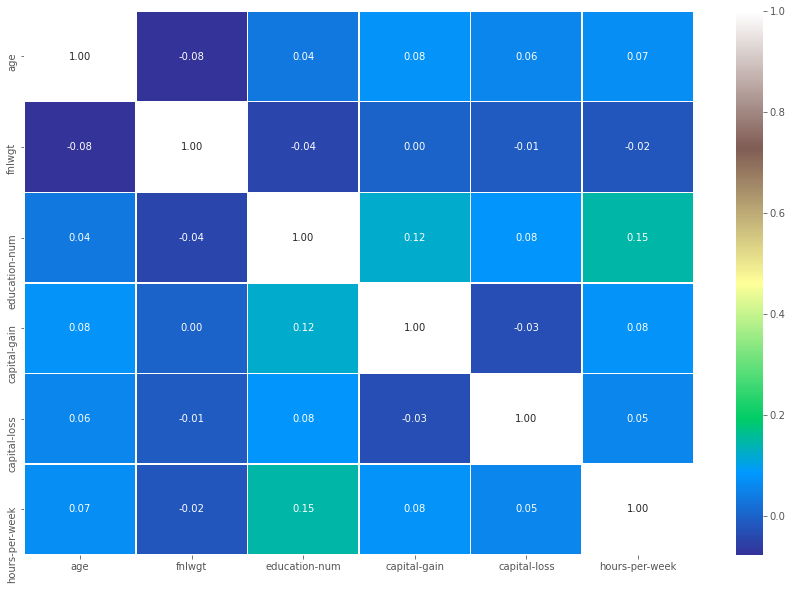

In [106]:
# Another figure with a little better look

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt=".2f",
           cmap="terrain");

#### Modelling

In [107]:
df.value_counts()

age  workclass          fnlwgt  education      education-num  marital-status       occupation          relationship    race    sex      capital-gain  capital-loss  hours-per-week  native-country  SalaryRange
25    Private           195994   1st-4th       2               Never-married        Priv-house-serv     Not-in-family   White   Female  0             0             40               Guatemala       <=50K         3
23    Private           240137   5th-6th       3               Never-married        Handlers-cleaners   Not-in-family   White   Male    0             0             55               Mexico          <=50K         2
38    Private           207202   HS-grad       9               Married-civ-spouse   Machine-op-inspct   Husband         White   Male    0             0             48               United-States   >50K          2
30    Private           144593   HS-grad       9               Never-married        Other-service       Not-in-family   Black   Male    0             0  

In [108]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'SalaryRange'],
      dtype='object')

In [109]:
df.rename(columns = {'capital-gain':'CapitalGain'}, inplace = True)

In [110]:
df.rename(columns = {'capital-loss':'CapitalLoss'}, inplace = True)

In [111]:
df.rename(columns = {'marital-status':'MaritalStatus'}, inplace = True)

In [112]:
df.rename(columns = {'education-num':'EducationNum'}, inplace = True)

In [113]:
df.rename(columns = {'hours-per-week':'HoursPerWeek'}, inplace = True)

In [114]:
df.head()

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,sex,CapitalGain,CapitalLoss,HoursPerWeek,native-country,SalaryRange
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [115]:
df.dropna(inplace=True)

In [116]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [117]:
df.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [118]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [119]:
# Everything except target variable
X = df.drop("sex", axis=1)

# Target variable
y = df["sex"]

In [120]:
# Independent variables (no target column)
X.head()

,age,workclass,fnlwgt,education,EducationNum,MaritalStatus,occupation,relationship,race,CapitalGain,CapitalLoss,HoursPerWeek,native-country,SalaryRange
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K


In [121]:
# Converting the X dataset into dummy variables
X = pd.get_dummies(X)

In [122]:
# # Independent variables (no Sex column)
X

,age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,SalaryRange_ <=50K,SalaryRange_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [123]:
# Sex column
y

0           Male
1           Male
2           Male
3           Male
4         Female
          ...   
32556     Female
32557       Male
32558     Female
32559       Male
32560     Female
Name: sex, Length: 32561, dtype: object

#### Splitting the data into Train & Test

In [124]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2) 

In [125]:
X_train

,age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,SalaryRange_ <=50K,SalaryRange_ >50K
5514,33,198183,13,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
19777,36,86459,11,0,1887,50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10781,58,203039,5,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
32240,21,180190,11,0,0,46,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9876,27,279872,10,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,359461,13,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5390,31,147215,8,0,0,21,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
860,18,216284,7,0,0,20,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
15795,50,54261,9,0,0,84,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [126]:
X_test

,age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,SalaryRange_ <=50K,SalaryRange_ >50K
14160,27,160178,10,0,0,38,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
27048,45,50567,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
28868,29,185908,13,0,0,55,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5667,30,190040,13,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7827,29,189346,10,2202,0,50,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,71,269708,13,2329,0,16,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
24534,55,253062,10,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
18080,47,354148,15,99999,0,48,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10354,27,43652,13,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [127]:
y_train, len(y_train)

(5514      Female
 19777       Male
 10781       Male
 32240       Male
 9876        Male
           ...   
 29802       Male
 5390      Female
 860       Female
 15795       Male
 23654       Male
 Name: sex, Length: 26048, dtype: object,
 26048)

In [128]:
y_test, len(y_test)

(14160     Female
 27048     Female
 28868       Male
 5667      Female
 7827        Male
           ...   
 1338      Female
 24534       Male
 18080       Male
 10354     Female
 24639       Male
 Name: sex, Length: 6513, dtype: object,
 6513)

#### Model choices

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

### Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [130]:
# Loading Linear Regression
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the model
LR_model.fit(X_train, y_train)

#predict
LR_predicted_y_test  = LR_model.predict(X_test)

#actual
LR_actual_y_test = y_test

In [131]:
LR_predicted_y_test

array([' Male', ' Male', ' Male', ..., ' Male', ' Male', ' Male'],
      dtype=object)

In [132]:
LR_actual_y_test

14160     Female
27048     Female
28868       Male
5667      Female
7827        Male
          ...   
1338      Female
24534       Male
18080       Male
10354     Female
24639       Male
Name: sex, Length: 6513, dtype: object

### K-Nearest Neighbors - KNeighboursClassifier()

In [133]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [134]:
# Loading K-Nearest Neighbors
KNN_model = KNC(n_neighbors = 3)

# Fitting the model
KNN_model.fit(X_train, y_train)

#predict
KNN_predicted_y_test  = KNN_model.predict(X_test)

#actual
KNN_actual_y_test = y_test

In [135]:
KNN_predicted_y_test

array([' Male', ' Female', ' Male', ..., ' Male', ' Female', ' Male'],
      dtype=object)

In [136]:
KNN_actual_y_test

14160     Female
27048     Female
28868       Male
5667      Female
7827        Male
          ...   
1338      Female
24534       Male
18080       Male
10354     Female
24639       Male
Name: sex, Length: 6513, dtype: object

### RandomForest Classification

In [137]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [138]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(X_train, y_train)

#prediction 
RF_predicted_y_test = RF_model.predict(X_test)

#actual
RF_actual_y_test = y_test

In [139]:
RF_predicted_y_test

array([' Male', ' Male', ' Male', ..., ' Male', ' Male', ' Male'],
      dtype=object)

In [140]:
RF_actual_y_test

14160     Female
27048     Female
28868       Male
5667      Female
7827        Male
          ...   
1338      Female
24534       Male
18080       Male
10354     Female
24639       Male
Name: sex, Length: 6513, dtype: object

### Model Comparison

In [141]:
print ( 'Logistic Regression:',LR_model.score(X_train,y_train),
        'K-Nearest Neighbor:',KNN_model.score(X_train,y_train),
        'Random Forest Classifier:',RF_model.score(X_train,y_train),sep="\n")

Logistic Regression:
0.6682278869778869
K-Nearest Neighbor:
0.8286624692874693
Random Forest Classifier:
0.668112714987715


<Figure size 1440x1296 with 0 Axes>

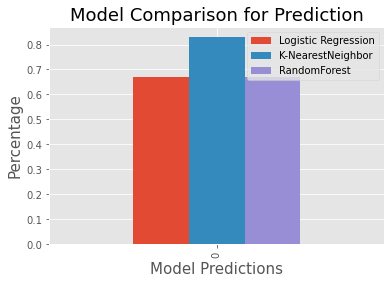

In [142]:
# A figure created to show the comparison of the three model predictions

A = (LR_model.score(X_train,y_train),KNN_model.score(X_train, y_train),RF_model.score(X_train,y_train))
B = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(20, 18))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Logistic Regression","K-NearestNeighbor","RandomForest"]);